**Trading Decisions using Fuzzy Logic**



Tujuan:
> untuk menganalisis ribuan sekuritas pada sistem trading secara real time dan memberikan informasi berupa peluang trading terbaik kepada investor

Manfaat:
> Mengurangi ruang lingkup keputusan untuk trading

Di definisikan duan input berupa *Moving Average* (MA) dan *Relative Strength Index* (RSI) dan output *Trading Signal* (TS)

dengan rules sebagai berikut:
1.   Jika *Moving Average* (MA) rendah dan *Relative Strength Index* (RSI) juga rendah, maka keputusannya adalah *Sell* (Jual) Saham
2.   Jika *Moving Average* (MA) tinggi dan *Relative Strength Index* (RSI) juga tinggi, maka keputusannya adalah *Buy* (Beli) Saham









**INPUT**

X: Universe of Discourse [0,100]

Partitions:
*   low = [0,0,50]
*   high = [0,50,100]

Rules:

R1 : if MA is ma_low and RSI is rsi_low then SS

R2 : if MA is ma_high and RSI is rsi_high then SB




**OUTPUT**
*   SS (Signal Sell)
*   SB (Signal Buy)






In [1]:
import warnings
warnings.filterwarnings('ignore')

**FUZZYFICATION**

In [2]:
#input values
MA = 40
RSI = 80

print("Moving Average :", MA)
print("Relative Strength Index:", RSI)

Moving Average : 40
Relative Strength Index: 80


In [3]:
#function untuk fuzzyfication
def linearDecreasing(x,alpha, beta):
    if x<alpha:
        return 1
    if alpha<x and x<=beta:
        return (beta - x)/(beta - alpha)
    else:
        return 0

def triangular(x, a, b, c):
    if x <= a or x >= c:
        return 0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x < c:
        return (c - x) / (c - b)
    else:
        return 0

In [4]:
#fuzzy partition
def partition(x):
  low = 0; high = 0

  if x>0 and x<50:
    low = linearDecreasing(x,0,50)

  if x>0 and x<100:
    high = triangular(x,0,50,100)

  return low, high

In [5]:
#fuzzy values untuk semua fuzzy sets
ma_low, ma_high = partition(MA)
rsi_low, rsi_high = partition(RSI)

**INFERENCE**

In [6]:
#penerapan rules pada fuzzy sets
def rule(ma_low, ma_high
         ,rsi_low, rsi_high):
  SS = min(ma_low, rsi_low)
  SB = min(ma_high, rsi_high)
  return SS, SB

SS, SB = rule(ma_low, ma_high, rsi_low, rsi_high)

**DEFUZZYFICATION**

In [7]:
#De-fuzzifications
def defuzzification(SS, SB):
    # area = daerah segitiga
    # c = pusat
    areaSS = 0; areaSB = 0;
    cSS = 0; cSB = 0

    if SS != 0:
        # parameter Fuzzy membership function
        beta = 50
        alpha = 0

      # menghitung area linier decreasing function SS
        x1 = beta - alpha
        h = 1
        areaSS = SS*((1/2) * h * x1)
        cSS = alpha + (2/3) * (beta - alpha)

    if SB != 0:
        # parameter Fuzzy membership function
        a = 0
        b = 50
        c = 100

        # menghitung area triangle membership function SB
        x1 = (SB * (b - a) + a)
        x2 = (c - SB * (c - b))
        d1 = (c - a)
        d2 = x2 - x1
        areaSB = (1 / 2) * SB * (d1 + d2)
        cSB = (1 / 3) * (a + x1 + x2)

    # Menghitung derajat keanggotaan untuk setiap himpunan fuzzy putput
    #N = Σ (Degree of Membership * Crisp Value)
    numerator = areaSS*cSS + areaSB*cSB

    #D = Σ (Degree of Membership)
    denominator = areaSS + areaSB

# Menghitung deffuzifikasion menggunakan metode rata rata tertimbang
    #menentukan crisp value
    if denominator !=0:
        #Crisp Value = N / D
        crisp_output = numerator / denominator
    else:
        crisp_output = 0  # definisikan value ketika tidak ada area
        print("tidak ada hasil")

    return crisp_output

# nilai crisp final (hasil defuzzifikasi)
crisp_value = defuzzification(SS, SB)
print("Crisp Value:", crisp_value)

Crisp Value: 33.33333333333333


In [8]:
#penerapan crisp value pada rules untuk membuat keputusan
def rules(crisp_value):
    if crisp_value < 25:
        return "SS"  # Sell Signal
    elif 25 <= crisp_value < 50:
        return "SS"  # Sell Signal
    elif 50 <= crisp_value < 75:
        return "SB"  # Buy Signal
    else:
        return "SB"  # Buy Signal

# terapkan defzzification function pada rules
crisp_value = defuzzification(SS, SB)
trading_signal = rules(crisp_value)

# Menunjukkan keputusan Trading Signal (output)
print("Trading Signal:", trading_signal)


Trading Signal: SS


**Kesimpulan**

> Berdasarkan algoritma fuzzy logic dengan input Moving Average = 40 dan Relative Strength Index = 80, didapatkan nilai tegas ("crisp value") sebesar 33,33 sehingga didapatkan keputusan Sell Signal (SS) yang artinya pengguna trading saham disarankan untuk menjual sahamnya.  



**Lampiran**



Persamaan Fuzzy Membership value untuk Triangle

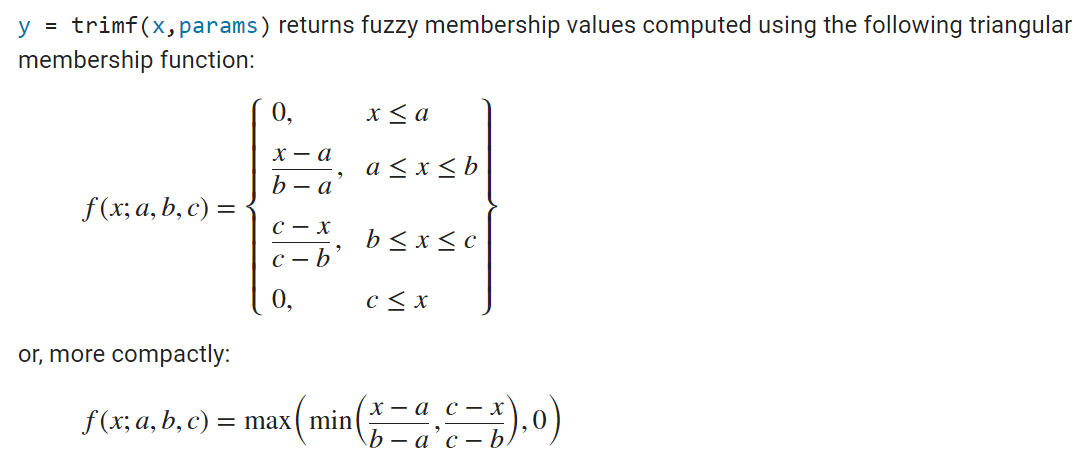

Menunjukkan Fuzzy Values

In [9]:
import numpy as np

In [10]:
#menunjukkan fuzzy values untuk semua fuzzy sets
output = [[ma_low, ma_high]
          ,[rsi_low, rsi_high]]

print("Fuzzy values dari crisp inputs")
print('LOW','HIGH')
print(np.round(output,2))

Fuzzy values dari crisp inputs
LOW HIGH
[[0.2 0.8]
 [0.  0.4]]


In [11]:
#Menunjukkan fuzzy values untuk semua rules
output_rules = [SS, SB]
print("Fuzzy output:")
print('SS', 'SB')
print(np.round(output_rules,2))

Fuzzy output:
SS SB
[0.  0.4]


Bentuk dari membership function

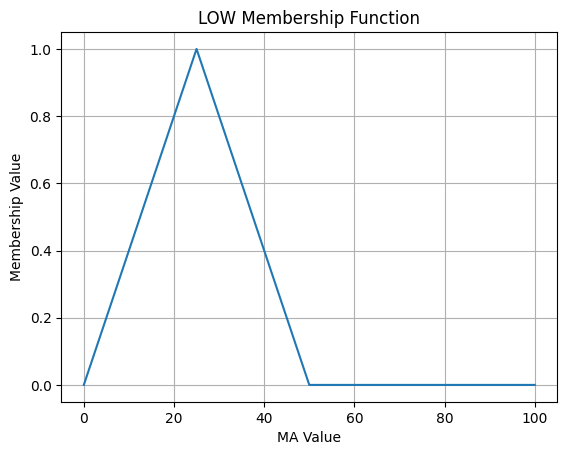

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Fuzzy membership function parameters
a = 0
b = 25
c = 50

def triangular(x, a, b, c):
    if a <= x <= b:
        return (x - a) / (b - a)
    elif b < x <= c:
        return (c - x) / (c - b)
    else:
        return 0

x_values = np.arange(0, 101, 1)
membership_values = [triangular(x, a, b, c) for x in x_values]

plt.plot(x_values, membership_values)
plt.xlabel('MA Value')
plt.ylabel('Membership Value')
plt.title('LOW Membership Function')
plt.grid()
plt.show()


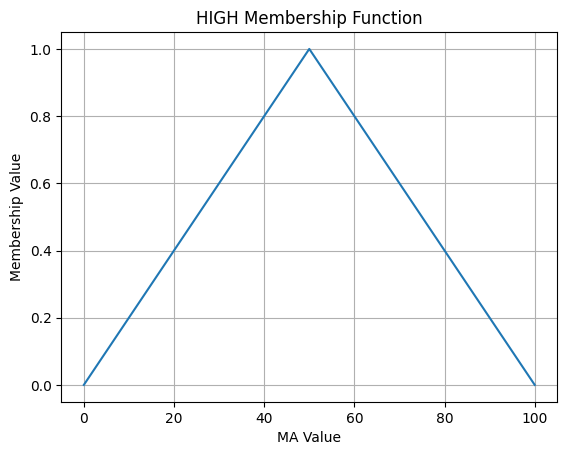

In [13]:
# Fuzzy membership function parameters
a = 0
b = 50
c = 100

def triangular(x, a, b, c):
    if a <= x <= b:
        return (x - a) / (b - a)
    elif b < x <= c:
        return (c - x) / (c - b)
    else:
        return 0

x_values = np.arange(0, 101, 1)
membership_values = [triangular(x, a, b, c) for x in x_values]

plt.plot(x_values, membership_values)
plt.xlabel('MA Value')
plt.ylabel('Membership Value')
plt.title('HIGH Membership Function')
plt.grid()
plt.show()

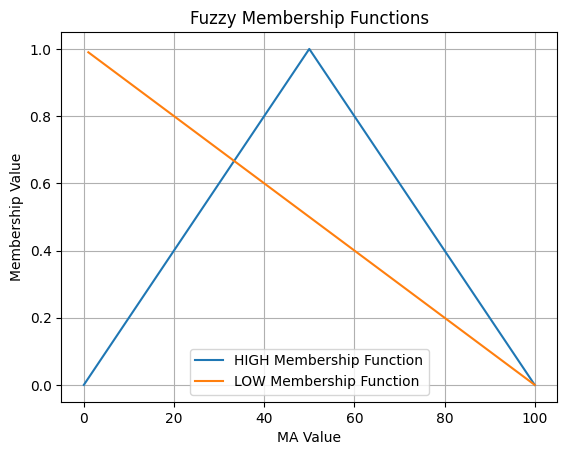

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Fuzzy membership function parameters for HIGH
a_high = 0
b_high = 50
c_high = 100

# Fuzzy membership function parameters for LOW
a_low = 0
b_low = 0
c_low = 100

def triangular(x, a, b, c):
    if a <= x <= b:
        return (x - a) / (b - a)
    elif b < x <= c:
        return (c - x) / (c - b)
    else:
        return 0

x_values = np.arange(0, 101, 1)
membership_values_high = [triangular(x, a_high, b_high, c_high) for x in x_values]
membership_values_low = [triangular(x, a_low, b_low, c_low) for x in x_values]

plt.plot(x_values, membership_values_high, label='HIGH Membership Function')
plt.plot(x_values, membership_values_low, label='LOW Membership Function')
plt.xlabel('MA Value')
plt.ylabel('Membership Value')
plt.title('Fuzzy Membership Functions')
plt.grid()
plt.legend()
plt.show()


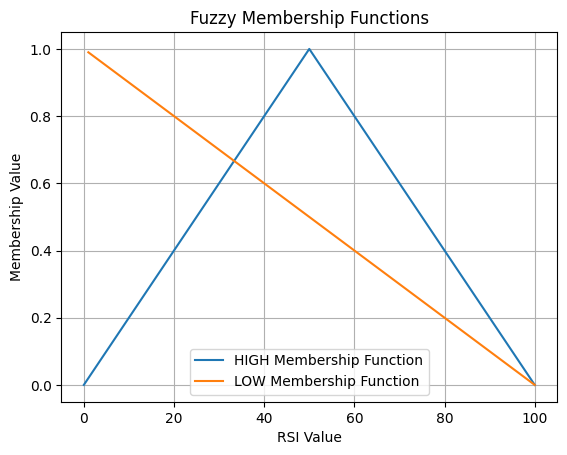

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Fuzzy membership function parameters for HIGH
a_high = 0
b_high = 50
c_high = 100

# Fuzzy membership function parameters for LOW
a_low = 0
b_low = 0
c_low = 100

def triangular(x, a, b, c):
    if a <= x <= b:
        return (x - a) / (b - a)
    elif b < x <= c:
        return (c - x) / (c - b)
    else:
        return 0

x_values = np.arange(0, 101, 1)
membership_values_high = [triangular(x, a_high, b_high, c_high) for x in x_values]
membership_values_low = [triangular(x, a_low, b_low, c_low) for x in x_values]

plt.plot(x_values, membership_values_high, label='HIGH Membership Function')
plt.plot(x_values, membership_values_low, label='LOW Membership Function')
plt.xlabel('RSI Value')
plt.ylabel('Membership Value')
plt.title('Fuzzy Membership Functions')
plt.grid()
plt.legend()
plt.show()
